# From the Description can we predict the Flavors (Multi-Label prediction)

In [ ]:
#https://www.kaggle.com/roccoli/multi-label-classification-with-sklearn
#https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
#https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
#https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
#https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/
#https://mlr.mlr-org.com/articles/tutorial/multilabel.html
#https://medium.com/coinmonks/multi-label-classification-blog-tags-prediction-using-nlp-b0b5ee6686fc

#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline


from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df_review=pd.read_excel("../CannaConnect/Dataset/description_clean.xlsx")
df=df_review.Description.astype(str)
df.head()

0     og   hybrid strain pack strong punch name sup...
1     aloha white widow especially potent cut white...
2     sativa dominant hybrid bred spain medical see...
3     dawgs hybrid g chemdawg genetics bred canadia...
4    known kosher tangie k gold  indica dominant hy...
Name: Description, dtype: object

In [4]:
df.shape

(2349,)

In [5]:
EDA=pd.read_excel('../CannaConnect/Dataset/EDA.xlsx')
EDA.head()

,Unnamed: 0,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,NaN
1,1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,NaN
2,2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,NaN
3,3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,NaN
4,4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,NaN


In [6]:
EDA=pd.DataFrame(EDA,columns=['Flavor_1','Flavor_2','Flavor_3','Flavor_4'])
EDA.head()

,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,Earthy,Sweet,Citrus,NaN
1,Flowery,Violet,Diesel,NaN
2,Spicy/Herbal,Sage,Woody,NaN
3,Apricot,Citrus,Grapefruit,NaN
4,Citrus,Earthy,Orange,NaN


In [7]:
EDA.fillna('None', inplace = True)

In [8]:
des_type=pd.concat([df,EDA],axis=1)
des_type.head()

,Description,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,og hybrid strain pack strong punch name sup...,Earthy,Sweet,Citrus,None
1,aloha white widow especially potent cut white...,Flowery,Violet,Diesel,None
2,sativa dominant hybrid bred spain medical see...,Spicy/Herbal,Sage,Woody,None
3,dawgs hybrid g chemdawg genetics bred canadia...,Apricot,Citrus,Grapefruit,None
4,known kosher tangie k gold indica dominant hy...,Citrus,Earthy,Orange,None


In [9]:
mlb=MultiLabelBinarizer()
Y=pd.DataFrame(mlb.fit_transform(des_type[['Flavor_1']].values), columns=mlb.classes_, index=des_type.index)
print(Y.head())

   Ammonia  Apple  Apricot  Berry  Blue  Blueberry  Butter  Cheese  Chemical  \
0        0      0        0      0     0          0       0       0         0   
1        0      0        0      0     0          0       0       0         0   
2        0      0        0      0     0          0       0       0         0   
3        0      0        1      0     0          0       0       0         0   
4        0      0        0      0     0          0       0       0         0   

   Citrus  ...  Strawberry  Sweet  Tar  Tea  Tobacco  Tree  Tropical  Vanilla  \
0       0  ...           0      0    0    0        0     0         0        0   
1       0  ...           0      0    0    0        0     0         0        0   
2       0  ...           0      0    0    0        0     0         0        0   
3       0  ...           0      0    0    0        0     0         0        0   
4       1  ...           0      0    0    0        0     0         0        0   

   Violet  Woody  
0       0    

In [10]:
des_type=pd.concat([df,Y],axis=1)
des_type.head()

,Description,Ammonia,Apple,Apricot,Berry,Blue,Blueberry,Butter,Cheese,Chemical,...,Strawberry,Sweet,Tar,Tea,Tobacco,Tree,Tropical,Vanilla,Violet,Woody
0,og hybrid strain pack strong punch name sup...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aloha white widow especially potent cut white...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sativa dominant hybrid bred spain medical see...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,dawgs hybrid g chemdawg genetics bred canadia...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,known kosher tangie k gold indica dominant hy...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
categories = list(des_type.columns.values)
categories = categories[1:]
print(categories)

['Ammonia', 'Apple', 'Apricot', 'Berry', 'Blue', 'Blueberry', 'Butter', 'Cheese', 'Chemical', 'Citrus', 'Coffee', 'Diesel', 'Earthy', 'Flowery', 'Grape', 'Grapefruit', 'Honey', 'Lavender', 'Lemon', 'Lime', 'Mango', 'Menthol', 'Mint', 'Minty', 'None', 'Nutty', 'Orange', 'Peach', 'Pear', 'Pepper', 'Pine', 'Pineapple', 'Plum', 'Pungent', 'Rose', 'Sage', 'Skunk', 'Spicy/Herbal', 'Strawberry', 'Sweet', 'Tar', 'Tea', 'Tobacco', 'Tree', 'Tropical', 'Vanilla', 'Violet', 'Woody']


In [12]:
counts = []
for category in categories:
    counts.append((category, des_type[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats.head()

,category,number of comments
0,Ammonia,11
1,Apple,6
2,Apricot,3
3,Berry,121
4,Blue,3


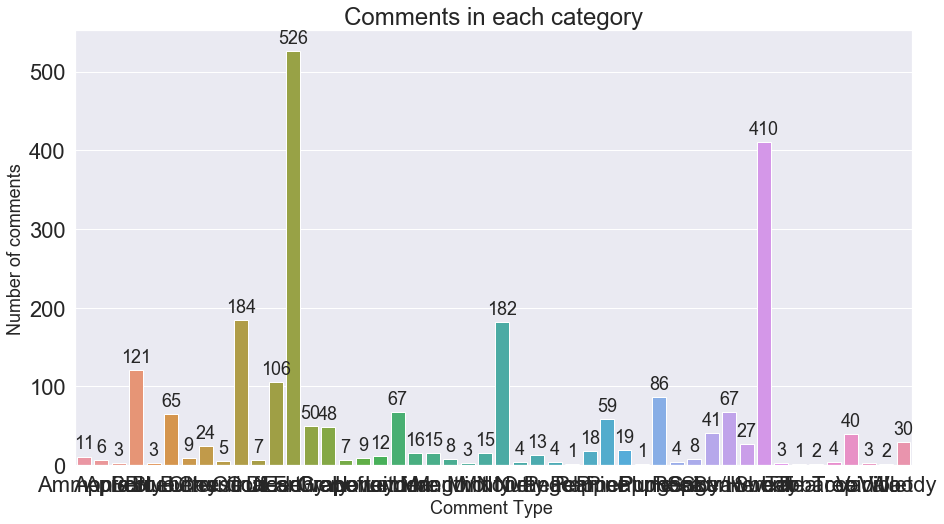

In [13]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, des_type.iloc[:,1:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = des_type.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

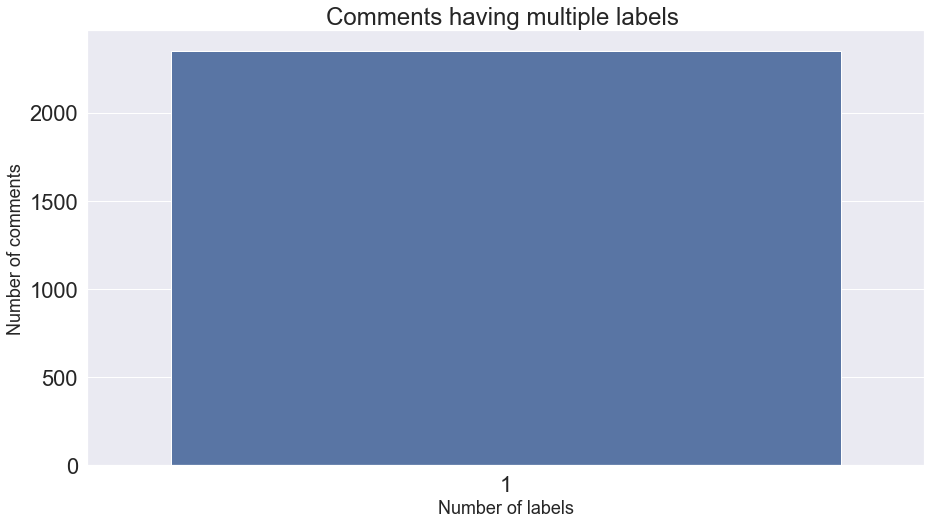

In [14]:
rowSums = des_type.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)


plt.show()

In [15]:
multiLabel_counts.head()

1    2349
dtype: int64

In [16]:
train, test = train_test_split(des_type, random_state=42, test_size=0.20, shuffle=True)
print(train.shape)
print(test.shape)

(1879, 49)
(470, 49)


In [17]:
train_text = train['Description']
test_text = test['Description']

In [18]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [19]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Description'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Description'], axis=1)

In [20]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [21]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Ammonia comments...**

Test accuracy is 0.997872340425532




**Processing Apple comments...**

Test accuracy is 0.997872340425532




**Processing Apricot comments...**

Test accuracy is 1.0




**Processing Berry comments...**

Test accuracy is 0.9446808510638298




**Processing Blue comments...**

Test accuracy is 1.0




**Processing Blueberry comments...**

Test accuracy is 0.9638297872340426




**Processing Butter comments...**

Test accuracy is 0.9936170212765958




**Processing Cheese comments...**

Test accuracy is 0.9936170212765958




**Processing Chemical comments...**

Test accuracy is 0.9936170212765958




**Processing Citrus comments...**

Test accuracy is 0.9276595744680851




**Processing Coffee comments...**

Test accuracy is 0.997872340425532




**Processing Diesel comments...**

Test accuracy is 0.951063829787234




**Processing Earthy comments...**

Test accuracy is 0.7531914893617021




**Processing Flowery comments...**

Test accuracy is 0.9723404255319149




**Processing Grape comments...**

Test accuracy is 0.9829787234042553




**Processing Grapefruit comments...**

Test accuracy is 0.997872340425532




**Processing Honey comments...**

Test accuracy is 0.9957446808510638




**Processing Lavender comments...**

Test accuracy is 1.0




**Processing Lemon comments...**

Test accuracy is 0.9851063829787234




**Processing Lime comments...**

Test accuracy is 0.9936170212765958




**Processing Mango comments...**

Test accuracy is 0.9893617021276596




**Processing Menthol comments...**

Test accuracy is 0.9914893617021276




**Processing Mint comments...**

Test accuracy is 1.0




**Processing Minty comments...**

Test accuracy is 0.9936170212765958




**Processing None comments...**

Test accuracy is 0.9212765957446809




**Processing Nutty comments...**

Test accuracy is 1.0




**Processing Orange comments...**

Test accuracy is 1.0




**Processing Peach comments...**

Test accuracy is 1.0




**Processing Pear comments...**

Test accuracy is 1.0




**Processing Pepper comments...**

Test accuracy is 0.9872340425531915




**Processing Pine comments...**

Test accuracy is 0.9829787234042553




**Processing Pineapple comments...**

Test accuracy is 0.9957446808510638




**Processing Plum comments...**

Test accuracy is 1.0




**Processing Pungent comments...**

Test accuracy is 0.9638297872340426




**Processing Rose comments...**

Test accuracy is 0.9936170212765958




**Processing Sage comments...**

Test accuracy is 1.0




**Processing Skunk comments...**

Test accuracy is 0.9914893617021276




**Processing Spicy/Herbal comments...**

Test accuracy is 0.9787234042553191




**Processing Strawberry comments...**

Test accuracy is 0.9893617021276596




**Processing Sweet comments...**

Test accuracy is 0.825531914893617




**Processing Tar comments...**

Test accuracy is 0.997872340425532




**Processing Tea comments...**

Test accuracy is 1.0




**Processing Tobacco comments...**

Test accuracy is 0.997872340425532




**Processing Tree comments...**

Test accuracy is 0.9957446808510638




**Processing Tropical comments...**

Test accuracy is 0.9808510638297873




**Processing Vanilla comments...**

Test accuracy is 0.997872340425532




**Processing Violet comments...**

Test accuracy is 0.997872340425532




**Processing Woody comments...**

Test accuracy is 0.9851063829787234


Wall time: 11.8 s


In [22]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.010638297872340425


Wall time: 1min 43s


In [23]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [24]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.17446808510638298


Wall time: 58.5 s


In [25]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [26]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.22340425531914893


Wall time: 1.2 s


In [27]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [28]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.01702127659574468


Wall time: 3min 38s
